## 변수설명

* ID : 집을 구분하는 번호
* date : 집을 구매한 날짜
* price : 집의 가격(Target variable)
* bedrooms : 침실의 수
* bathrooms : 화장실의 수
    - full bath : 화장실, 세면대, 샤워실, 욕조
    - 3/4 bath : 화장실, 세면대, 샤워실
    - half bath : 화장실, 세면대
* sqft_living : 주거 공간의 평방 피트(면적)
* sqft_lot : 부지의 평방 피트(면적)
* floors : 집의 층 수
* waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
* view : Has been viewed
* condition : 집의 전반적인 상태
* grade : King County grading 시스템 기준으로 매긴 집의 등급
* sqft_above : 지하실을 제외한 평방 피트(면적)
* sqft_basement : 지하실의 평방 피트(면적)
* yr_built : 지어진 년도
* yr_renovated : 집을 재건축한 년도
* zipcode : 우편번호
* lat : 위도
* long : 경도
* sqft_living15 : 2015년 기준 주거 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있음)
* sqft_lot15 : 2015년 기준 주차 공간의 평방 피트(면적, 집을 재건축했다면, 변화가 있을 수 있

In [1]:
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

In [2]:
df_train = pd.read_csv('train.csv')
df_test  = pd.read_csv('test.csv')
print("train.csv. Shape: ",df_train.shape)
print("test.csv. Shape: ",df_test.shape)

train.csv. Shape:  (15035, 21)
test.csv. Shape:  (6468, 20)


In [ ]:
df_train.head()

In [ ]:
# 결측치 확인
#(df_train.isnull()).sum(axis=0) #걸럼별 결측치 계수

In [ ]:
# df_train["bathrooms"].drop_duplicates()

In [ ]:
f, ax = plt.subplots(figsize=(15, 5))
sns.distplot(df_train['price'])

In [ ]:
fig = plt.figure(figsize = (15,10))

fig.add_subplot(1,2,1)
res = stats.probplot(df_train['price'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(df_train['price']), plot=plt)

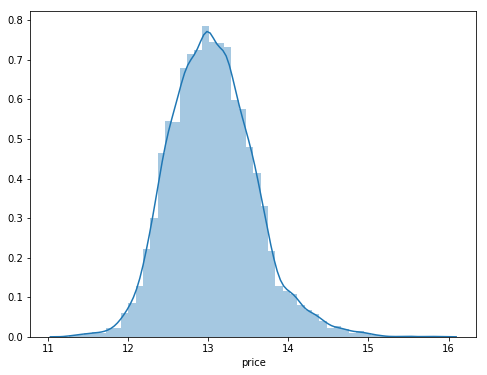

In [3]:
df_train['price'] = np.log1p(df_train['price'])
#histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_train['price'])

## 피어슨 상관계수

In [ ]:
import scipy as sp

cor_abs = abs(df_train.corr(method='spearman')) 
cor_cols = cor_abs.nlargest(n=10, columns='price').index # price과 correlation이 높은 column 10개 뽑기(내림차순)
# spearman coefficient matrix
cor = np.array(sp.stats.spearmanr(df_train[cor_cols].values))[0] # 10 x 10
print(cor_cols.values)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True , annot_kws={'size' : 8} ,xticklabels=cor_cols.values, yticklabels=cor_cols.values)

In [ ]:
cor_cols = df_train.corr(method='spearman').nlargest(n=10, columns='price').index # price과 correlation이 높은 column 10개 뽑기(내림차순)
# spearman coefficient matrix
cor = np.array(sp.stats.spearmanr(df_train[cor_cols].values))[0] # 10 x 10
print(cor_cols.values)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True , annot_kws={'size' : 8} ,xticklabels=cor_cols.values, yticklabels=cor_cols.values)

## price - grade간 boxplot

In [ ]:
data = pd.concat([df_train['price'], df_train['grade']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='grade', y="price", data=data)

In [ ]:
data = pd.concat([df_train['price'], df_train['sqft_living15']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='sqft_living15', y="price", data=data)

In [ ]:
df_train['price'] = np.log1p(df_train['price'])
price_grade = np.where(df_train['price'] <= 12, 'E', 
    np.where((12 < df_train['price']) & (df_train['price'] <= 13),'D',
    np.where((13 < df_train['price']) & (df_train['price'] <= 14),'C',
    np.where((14 < df_train['price']) & (df_train['price'] <= 15),'B',
    'A'))))
df_train['price_grade'] = price_grade

In [ ]:
data = pd.concat([df_train['lat'], df_train['long']], axis=1)
f, ax = plt.subplots(figsize=(15, 10))
fig = sns.scatterplot(x="long"
                     ,y="lat"
                     ,data=df_train
                     ,hue="price_grade"
                     ,style="price_grade"
                     ,c=price_grade
                     ,alpha=0.7)

In [ ]:
df_train['date'] = df_train['date'].apply(lambda x: x[0:6])
df_train['date'].unique()

In [ ]:
dt = df_train.groupby(['date'], as_index=False)['price'].mean()
sorted_zipcode = sorted(df_train['date'].unique())
f, ax = plt.subplots(10,0,figsize=(10, 10))
for i, zipcode in enumerate(sorted_zipcode):
    ax = sns.lineplot(x="date", y="price", data=dt)

In [ ]:
dt = df_train.groupby(['zipcode','date'], as_index=False)['price'].mean()
sorted_zipcode = sorted(df_train['zipcode'].unique())
f, ax = plt.subplots(10,0,figsize=(10, 10))
for i, zipcode in enumerate(sorted_zipcode):
    ax = sns.lineplot(x="date", y="price", data=dt[dt['zipcode'] == zipcode])

In [ ]:
##### dt = df_train.groupby(['date'], as_index=False)['price'].mean()
#sns.lineplot(x='date', y='price', data=dt)
dt = df_train.groupby(['zipcode','date'], as_index=False)['price'].mean()
sorted_zipcode = sorted(df_train['zipcode'].unique())
f, ax = plt.subplots(figsize=(10, 10))
for i, zipcode in enumerate(sorted_zipcode[:5]):
    #sns.lineplot(x='date', y='price', data=dt[dt['zipcode'] == zipcode], hue='zipcode')
    #ax[1][0].set_title(zipcode, fontsize=20)
    ax = sns.lineplot(x="date", y="price",
                        hue="zipcode", style="zipcode",
                        data=dt[dt['zipcode'] == zipcode])

In [ ]:
df_train = pd.read_csv('train.csv')
df_train['count'] = 1

In [ ]:
zipcode_count = df_train[['zipcode', 'count']].groupby('zipcode').sum()
zipcode_count.sort_values(["count"], ascending=[False]).head(5)

In [4]:
color_set = np.where(df_train['price'] <= 12, 'green', 
    np.where((12 < df_train['price']) & (df_train['price'] <= 13),'fuchsia',
    np.where((13 < df_train['price']) & (df_train['price'] <= 14),'blue',
    np.where((14 < df_train['price']) & (df_train['price'] <= 15),'yellow',
    'cyan'))))


In [19]:
data = pd.concat([df_train['lat'], df_train['long'], pd.Series(color_set)], axis=1)
data

,lat,long,0
0,47.5112,-122.257,fuchsia
1,47.7379,-122.233,fuchsia
2,47.6168,-122.045,blue
3,47.3097,-122.327,fuchsia
4,47.4095,-122.315,fuchsia
5,47.6007,-122.145,blue
6,47.6900,-122.292,blue
7,47.7558,-122.229,fuchsia
8,47.6127,-122.045,fuchsia
9,47.6700,-122.394,blue


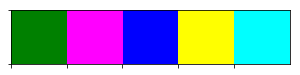

In [23]:
flatui = ["green", "fuchsia", "blue", "yellow", "cyan"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())

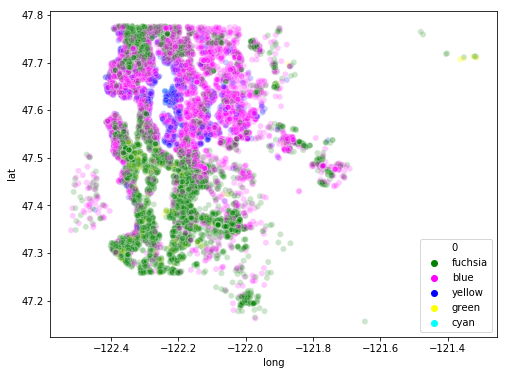

In [24]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.scatterplot(x='long', y="lat", data=data, color=, alpha=0.2)